In [18]:
import os
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import markovclick
from markovclick.viz import visualise_markov_chain

In [19]:
path='./json'
names=os.listdir(path)

rows=[]
all=[]
u=[]
for name in names:
    print(name)
    with open(path+'/'+name) as jsonfile:
        data=json.load(jsonfile)
        for i in data['dates']:
            for ii in i['sessions']:
                row=[]
                for a in ii['activities']:
                    for j in a['details']:
                        for jj in j['Page URL']:
                            all.append(jj)
                            if jj not in u:
                                u.append(jj)
                            row.append(jj)
                print(row)
                print()
                rows.append(row)


user-report-export (1).json
['/cart/', '/cart/', '/']

user-report-export (10).json
['/checkout/', '/checkout/order-received/219/?key=wc_order_lIhqKVxs6g5vG', '/checkout/', '/product/nike-air-max-720-betrue/', '/product/nike-air-max-720-betrue/', '/', '/', '/contact/', '/cart/', '/cart/', '/contact/', '/', '/product/wmns-viale-prem/', '/']

user-report-export (11).json
['/checkout/', '/checkout/order-received/204/?key=wc_order_XUyGSNehNzYHP', '/checkout/', '/cart/', '/product/jaab-xt-summer-mens-sneakers/', '/product/jaab-xt-summer-mens-sneakers/', '/']

user-report-export (12).json
['/', '/', '/checkout/', '/checkout/', '/checkout/', '/cart/', '/product/jaab-xt-mens-sneakers/', '/product/jaab-xt-mens-sneakers/', '/', '/']

user-report-export (13).json
['/', '/']

user-report-export (14).json
['/product/suede-classic-sneakers/', '/product/puma-sneakers/', '/product/jaab-xt-mens-sneakers/', '/']

user-report-export (15).json
['/checkout/order-received/220/?key=wc_order_LmNin6n45AX6s', '

user-report-export (72).json
['/']

user-report-export (73).json
['/']

user-report-export (74).json
['/']

user-report-export (75).json
['/']

user-report-export (76).json
['/']

['/']

user-report-export (77).json
['/']

user-report-export (78).json
['/']

user-report-export (79).json
['/']

user-report-export (8).json
['/product/puma-sneakers/', '/product/hybrid-runner-mens-running-shoes/', '/product/nike-air-max-720-betrue/', '/product/hybrid-runner-mens-running-shoes/', '/product/jaab-xt-summer-mens-sneakers/', '/product/hybrid-runner-mens-running-shoes/', '/shop/', '/']

user-report-export (9).json
['/', '/product/nike-air-max-720-betrue/', '/product/nike-air-max-720-betrue/', '/product/nike-air-max-720-betrue/', '/', '/product/puma-sneakers/', '/product/puma-sneakers/', '/product/puma-sneakers/', '/', '/product/suede-classic-sneakers/', '/product/suede-classic-sneakers/', '/product/suede-classic-sneakers/', '/', '/product/hybrid-runner-mens-running-shoes/', '/product/hybrid-runn

In [20]:
print(len(u))


28


In [21]:
labels={}
i=0
for every in u:
    i+=1
    n='A'+str(i)
    labels[every]=n


uniquelabels=[]
for row in rows:
    l=[]
    for i in row:
        l.append(labels[i])
    uniquelabels.append(l)

d=pd.DataFrame(uniquelabels)
#e=d.to_csv('./finalcsv_tsaideepak.csv',index=False,header=False)

In [22]:
labels

{'/cart/': 'A1',
 '/': 'A2',
 '/checkout/': 'A3',
 '/checkout/order-received/219/?key=wc_order_lIhqKVxs6g5vG': 'A4',
 '/product/nike-air-max-720-betrue/': 'A5',
 '/contact/': 'A6',
 '/product/wmns-viale-prem/': 'A7',
 '/checkout/order-received/204/?key=wc_order_XUyGSNehNzYHP': 'A8',
 '/product/jaab-xt-summer-mens-sneakers/': 'A9',
 '/product/jaab-xt-mens-sneakers/': 'A10',
 '/product/suede-classic-sneakers/': 'A11',
 '/product/puma-sneakers/': 'A12',
 '/checkout/order-received/220/?key=wc_order_LmNin6n45AX6s': 'A13',
 '/product/rs-x-toys-hotwheels-16-mens-sneakers/': 'A14',
 '/checkout/order-received/221/?key=wc_order_Hv9zVmJT86jqo': 'A15',
 '/checkout/order-received/202/?key=wc_order_rDzMLA1NC03Bw': 'A16',
 '/product/air-jordan-7-retro-sp/': 'A17',
 '/shop/': 'A18',
 '/2019/06/13/hello-world/': 'A19',
 '/shop/?orderby=popularity': 'A20',
 '/product/nike-mens-air-precision-basketball-shoes/': 'A21',
 '/checkout/order-received/203/?key=wc_order_Oz7N8r7sUkttE': 'A22',
 '/checkout/order-r

In [23]:
pagecount=[]
barlabels=list(labels.values())
for unique in u:
    #print(unique)
    pagecount.append(all.count(unique))

pagecount.remove(143)
barlabels.remove('A2')
print(pagecount)
print(barlabels)

[32, 17, 1, 14, 13, 4, 1, 4, 43, 20, 12, 1, 11, 1, 1, 3, 17, 1, 1, 3, 2, 2, 10, 3, 1, 1, 2]
['A1', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28']


<BarContainer object of 27 artists>

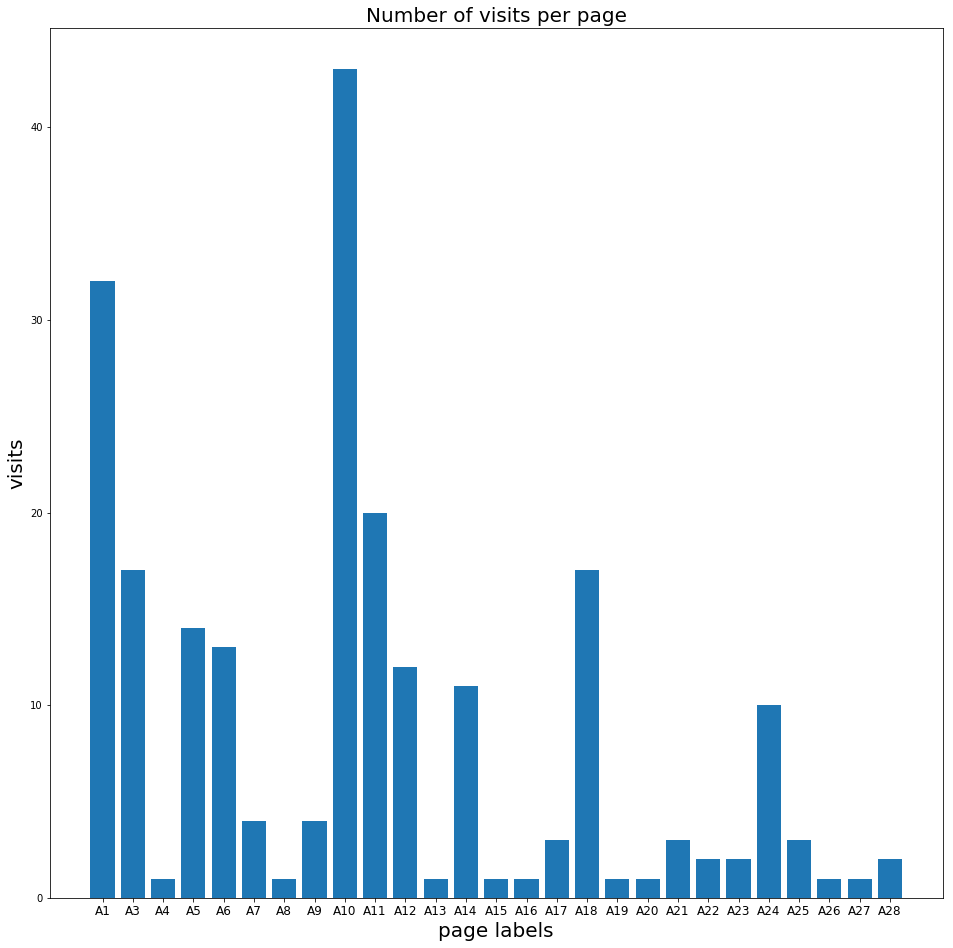

In [24]:
xaxis=np.arange(len(pagecount))

plt.figure(figsize=(16,16))
plt.title('Number of visits per page',fontsize=20)
plt.xlabel('page labels',fontsize=20)
plt.ylabel('visits',fontsize=20)
plt.xticks(xaxis,barlabels,fontsize=12)

plt.bar(xaxis,pagecount)


In [25]:
data=pd.read_csv('finalcsv.csv',header=None)
print(len(data))
print(data.shape)
data.head()

92
(92, 25)


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,A1,A1,A2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A3,A4,A3,A5,A5,A2,A2,A6,A1,A1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3,A8,A3,A1,A9,A9,A2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A2,A2,A3,A3,A3,A1,A10,A10,A2,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A2,A2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Markov Chains

In [26]:
from markovclick.models import MarkovClickstream
m = MarkovClickstream(uniquelabels)

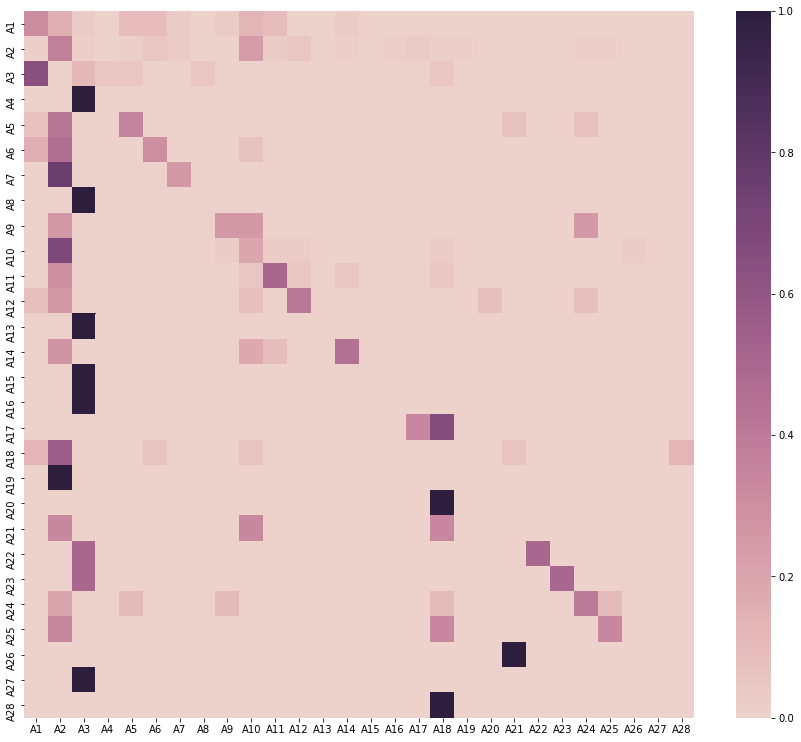

In [27]:
fig=plt.figure(figsize=(15, 13))
sns.heatmap(m.prob_matrix, xticklabels=m.pages, yticklabels=m.pages,cmap=sns.cubehelix_palette(100))

In [28]:
graph = visualise_markov_chain(m)
print(graph.source)


digraph {
	A1 [label=A1 fillcolor="#76ff03" fontcolor="#1a237e" fontname=Helvetica penwidth=0 style=filled]
	A1 -> A1 [label=0.31 arrowsize=0.75 color="#90caf9" fontname=Helvetica penwidth=1.5]
	A1 -> A2 [label="   0.16" arrowsize=0.5 color="#90caf9" fontname=Helvetica fontsize=10 penwidth=0.75]
	A2 [label=A2 fillcolor="#76ff03" fontcolor="#1a237e" fontname=Helvetica penwidth=0 style=filled]
	A2 -> A2 [label=0.37 arrowsize=0.75 color="#90caf9" fontname=Helvetica penwidth=1.5]
	A2 -> A10 [label="   0.24" arrowsize=0.5 color="#90caf9" fontname=Helvetica fontsize=10 penwidth=0.75]
	A3 [label=A3 fillcolor="#76ff03" fontcolor="#1a237e" fontname=Helvetica penwidth=0 style=filled]
	A3 -> A1 [label=0.65 arrowsize=0.75 color="#90caf9" fontname=Helvetica penwidth=1.5]
	A3 -> A3 [label="   0.12" arrowsize=0.5 color="#90caf9" fontname=Helvetica fontsize=10 penwidth=0.75]
	A4 [label=A4 fillcolor="#76ff03" fontcolor="#1a237e" fontname=Helvetica penwidth=0 style=filled]
	A4 -> A3 [label=1.00 arrowsiz

}


In [29]:
graph.render('markovchain_tsaideepak.gv', view=True)

'markovchain_tsaideepak.gv.pdf'

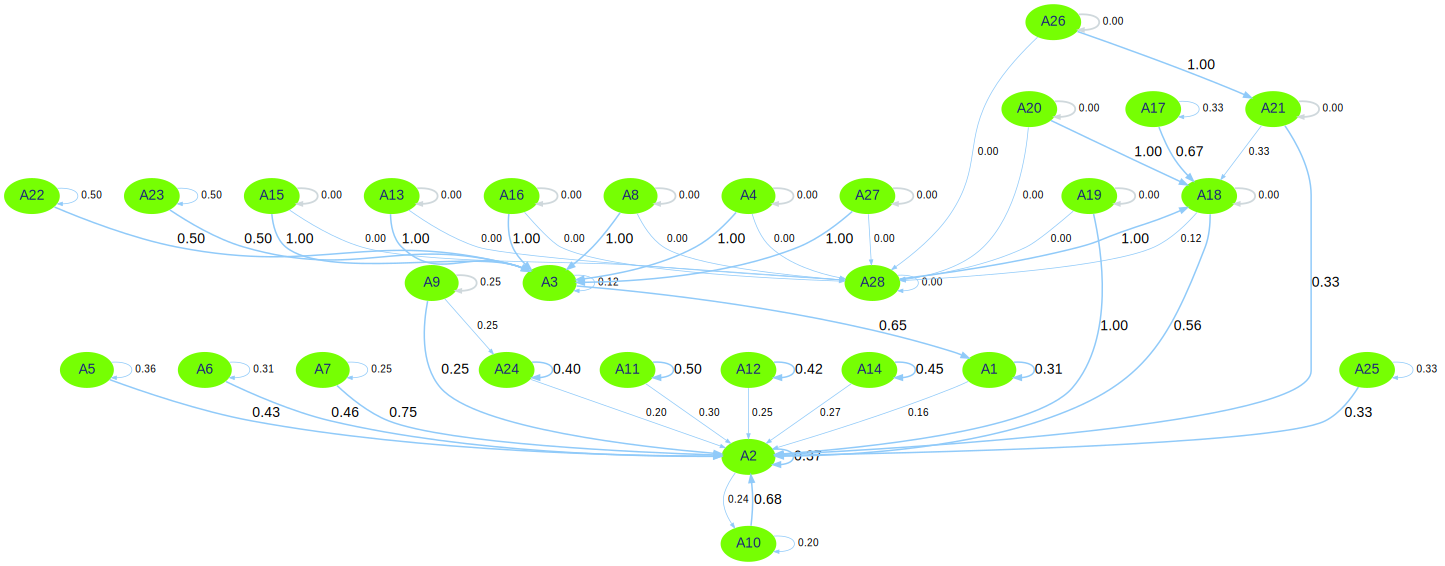

In [30]:
graph
